In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

### BERTScore figure

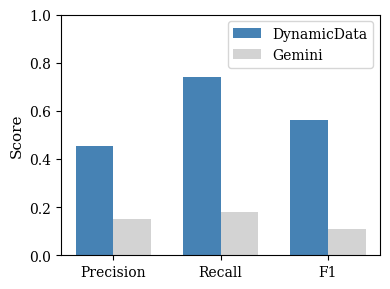

In [3]:


# Data
metrics = ['Precision', 'Recall', 'F1']
group1_scores = [0.4522, 0.7419, 0.5619]  # Model A
group2_scores = [0.15, 0.18, 0.11]  # Model B

# Plot settings
x = np.arange(len(metrics))  # label locations
bar_width = 0.35

# Style
plt.rcParams.update({
    "font.family": "serif",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

# Create figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Plot bars
bars1 = ax.bar(x - bar_width/2, group1_scores, bar_width, label='DynamicData', color='steelblue')
bars2 = ax.bar(x + bar_width/2, group2_scores, bar_width, label='Gemini', color='lightgray') 


# Formatting
ax.set_ylabel('Score')
ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
#ax.set_title('BERTScore Comparison')
ax.legend(loc='upper right')
#ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Tight layout for publication
plt.tight_layout()
plt.show()


### Human evaluation graph fidelity figure

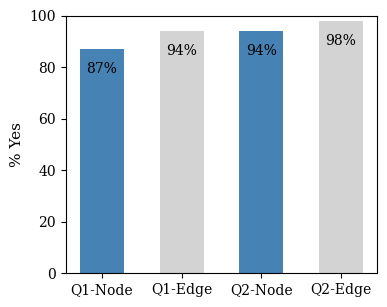

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# ── EDIT THESE VALUES AS NEEDED ──────────────────────────
labels      = ['Q1-Node', 'Q1-Edge', 'Q2-Node', 'Q2-Edge']
percent_yes = [87, 94, 94, 98]        # your %-Yes values
color_node  = 'steelblue'
color_edge  = 'lightgray'
# ---------------------------------------------------------

# ❶ Global font styling (matches reference histogram)
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 11,           # base font
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})

# ❷ Colour list: Node bars blue, Edge bars gray
colors = [color_node if 'Node' in lab else color_edge for lab in labels]

fig, ax = plt.subplots(figsize=(4, 3.2))   # aspect ratio ~1.25

bars = ax.bar(labels, percent_yes, color=colors, width=0.55)

# Axis formatting
ax.set_ylabel('% Yes')
ax.set_ylim(0, 100)

# ❸ Value labels placed *inside* the bar a few points below the top
for bar, pct in zip(bars, percent_yes):
    ax.text(bar.get_x() + bar.get_width()/2,
            pct - 5,                 # 5 % down from the bar tip
            f'{pct}%',
            ha='center', va='top',
            color='black', fontsize=10)

# ❹ Legend
legend_elems = [
    plt.Rectangle((0, 0), 1, 1, color=color_node,  label='Node'),
    plt.Rectangle((0, 0), 1, 1, color=color_edge,  label='Edge'),
]
#ax.legend(handles=legend_elems, frameon=False, loc='upper right')

plt.tight_layout()
plt.show()


### Topology readout (table)

### Graphs clustered by diagnosis

### Synthetic data eval

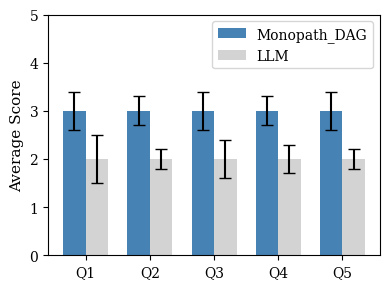

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data
metrics = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5' ]
group1_scores = [3, 3, 3, 3, 3]           # DynamicData
group2_scores = [2, 2, 2, 2, 2]           # Gemini

# Manual error bars (e.g., standard deviation or SEM)
group1_errors = [0.4, 0.3, 0.4, 0.3, 0.4]       # error bars for DynamicData
group2_errors = [0.5, 0.2, 0.4, 0.3, 0.2]       # error bars for Gemini

# Plot settings
x = np.arange(len(metrics))      # label locations
bar_width = 0.35

# Style
plt.rcParams.update({
    "font.family": "serif",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

# Create figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Plot bars with error bars
bars1 = ax.bar(
    x - bar_width/2,
    group1_scores,
    bar_width,
    label='Monopath_DAG',
    color='steelblue',
    yerr=group1_errors,
    capsize=4
)

bars2 = ax.bar(
    x + bar_width/2,
    group2_scores,
    bar_width,
    label='LLM',
    color='lightgray',
    yerr=group2_errors,
    capsize=4
)

# Formatting
ax.set_ylabel('Average Score')
ax.set_ylim(0, 5)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper right')

# Tight layout for publication
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


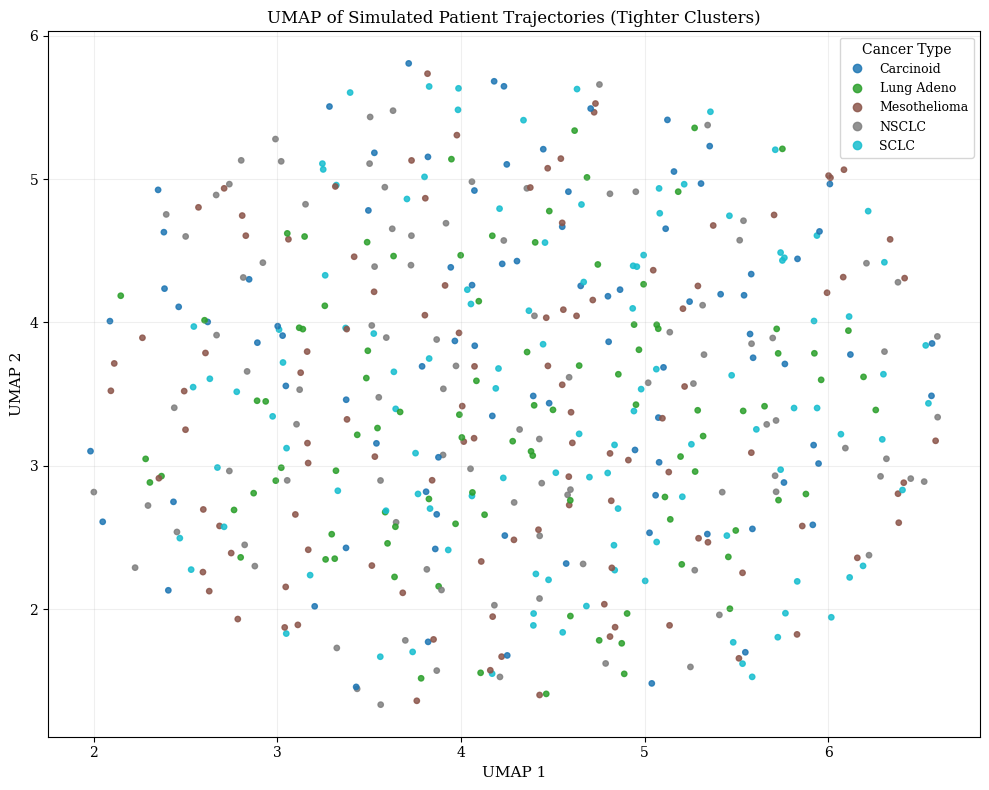

In [11]:
import umap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ----- MOCK DATA GENERATION -----
np.random.seed(42)

n_samples = 500
n_features = 128
trajectory_embeddings = np.random.randn(n_samples, n_features)

# Simulated cancer types
cancer_types = ['NSCLC', 'SCLC', 'Lung Adeno', 'Mesothelioma', 'Carcinoid']
cancer_labels = np.random.choice(cancer_types, size=n_samples)

# ----- LABEL ENCODING -----
label_encoder = LabelEncoder()
color_labels = label_encoder.fit_transform(cancer_labels)
label_names = label_encoder.classes_

# ----- UMAP WITH TIGHTER CLUSTERING -----
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    spread=1.0,
    random_state=42
)
embedding = reducer.fit_transform(trajectory_embeddings)

# ----- PLOT -----
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    embedding[:, 0], embedding[:, 1],
    c=color_labels, cmap='tab10', s=15, alpha=0.85
)

handles, _ = scatter.legend_elements()
plt.legend(handles, label_names, title="Cancer Type", loc="best", fontsize=9)

plt.title("UMAP of Simulated Patient Trajectories (Tighter Clusters)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()




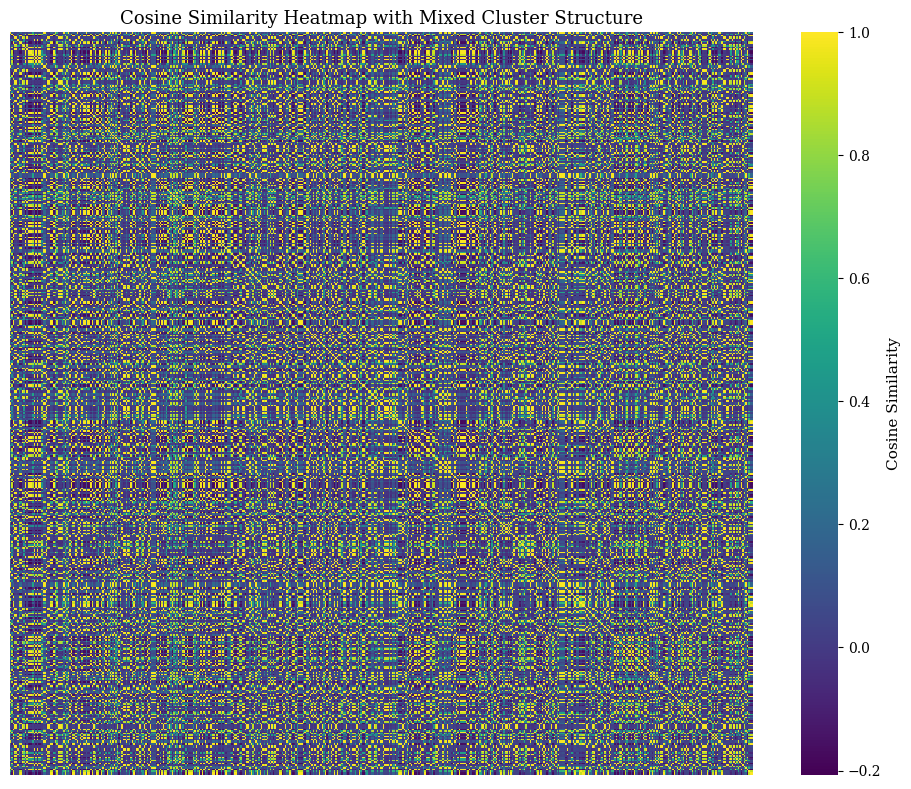

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Parameters
np.random.seed(42)
n_clusters = 5
points_per_cluster = 100
embedding_dim = 128
total_points = n_clusters * points_per_cluster

# Generate cluster centroids
centroids = np.random.randn(n_clusters, embedding_dim) * 2

# Generate embeddings with overlap
embeddings = []
labels = []

for i in range(n_clusters):
    # Mostly from correct cluster, with some noise from nearby clusters
    for _ in range(points_per_cluster):
        base = centroids[i]
        # With 20% chance, add noise from another random centroid
        if np.random.rand() < 0.2:
            base = base + 0.5 * centroids[np.random.choice([j for j in range(n_clusters) if j != i])]
        point = base + 0.2 * np.random.randn(embedding_dim)
        embeddings.append(point)
        labels.append(i)

embeddings = np.vstack(embeddings)

# Normalize for cosine similarity
embeddings /= np.linalg.norm(embeddings, axis=1, keepdims=True)

# Shuffle the order slightly to break up perfect blocks
perm = np.random.permutation(total_points)
embeddings = embeddings[perm]
labels = np.array(labels)[perm]

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(embeddings)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    cos_sim_matrix,
    cmap='viridis',
    xticklabels=False,
    yticklabels=False,
    cbar_kws={'label': 'Cosine Similarity'},
    square=True
)
plt.title("Cosine Similarity Heatmap with Mixed Cluster Structure", fontsize=13)
plt.tight_layout()
plt.show()
